In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import os

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))

reaction_table = pd.read_csv(
    os.path.join(PROJECT_ROOT, "outputs", "event_reaction_1d.csv")
)

reaction_table.head()

,event_id,event_type,event_date,SP500,NASDAQ,DXY,GOLD,VIX,UST_2Y,UST_10Y
0,NaN,NaN,NaN,ret_1d,ret_1d,ret_1d,ret_1d,chg_1d,bps_1d,bps_1d
1,CPI_2024_01,CPI,2024-01-11,0.039078658937885535,1.178670247395841,0.00794160693617929,0.07880401270694559,3.109375,-23.000000000000043,-8.000000000000007
2,CPI_2024_02,CPI,2024-02-13,0.5279860434151074,-1.437658293320232,-0.42254885107316786,3.2304364637949057,-83.3994140625,9.999999999999964,9.999999999999964
3,CPI_2024_03,CPI,2024-03-12,-0.07776983466383225,-0.4009888903929504,0.9255700092190677,-9.65834586884522,158.5,10.000000000000053,9.000000000000075
4,FOMC_2024_01,FOMC,2024-01-31,-0.3384898152380744,0.9650603741238939,-0.3813276551581257,4.282491937296529,-148.2607421875,-16.000000000000014,-18.99999999999995


In [63]:
avg_reactions = (
    reaction_table
    .groupby("event_type")
    .mean(numeric_only=True)
    .reset_index()
)

avg_reactions

,event_type
0,CPI
1,FOMC
2,NFP


In [64]:
print(avg_reactions.columns.tolist())

['event_type']


In [65]:
print(reaction_table.columns.tolist())
print(reaction_table.dtypes)
reaction_table.head()

['event_id', 'event_type', 'event_date', 'SP500', 'NASDAQ', 'DXY', 'GOLD', 'VIX', 'UST_2Y', 'UST_10Y']
event_id      object
event_type    object
event_date    object
SP500         object
NASDAQ        object
DXY           object
GOLD          object
VIX           object
UST_2Y        object
UST_10Y       object
dtype: object


,event_id,event_type,event_date,SP500,NASDAQ,DXY,GOLD,VIX,UST_2Y,UST_10Y
0,NaN,NaN,NaN,ret_1d,ret_1d,ret_1d,ret_1d,chg_1d,bps_1d,bps_1d
1,CPI_2024_01,CPI,2024-01-11,0.039078658937885535,1.178670247395841,0.00794160693617929,0.07880401270694559,3.109375,-23.000000000000043,-8.000000000000007
2,CPI_2024_02,CPI,2024-02-13,0.5279860434151074,-1.437658293320232,-0.42254885107316786,3.2304364637949057,-83.3994140625,9.999999999999964,9.999999999999964
3,CPI_2024_03,CPI,2024-03-12,-0.07776983466383225,-0.4009888903929504,0.9255700092190677,-9.65834586884522,158.5,10.000000000000053,9.000000000000075
4,FOMC_2024_01,FOMC,2024-01-31,-0.3384898152380744,0.9650603741238939,-0.3813276551581257,4.282491937296529,-148.2607421875,-16.000000000000014,-18.99999999999995


In [66]:
# Convert all non-event columns to numeric
for col in reaction_table.columns:
    if col != "event_type":
        reaction_table[col] = pd.to_numeric(reaction_table[col], errors="coerce")

reaction_table.dtypes

event_id      float64
event_type     object
event_date    float64
SP500         float64
NASDAQ        float64
DXY           float64
GOLD          float64
VIX           float64
UST_2Y        float64
UST_10Y       float64
dtype: object

In [67]:
# Fix identifier columns
reaction_table["event_id"] = reaction_table["event_id"].astype("Int64")
reaction_table["event_date"] = pd.to_datetime(reaction_table["event_date"], errors="coerce")

reaction_table.dtypes

event_id               Int64
event_type            object
event_date    datetime64[ns]
SP500                float64
NASDAQ               float64
DXY                  float64
GOLD                 float64
VIX                  float64
UST_2Y               float64
UST_10Y              float64
dtype: object

In [68]:
avg_reactions = (
    reaction_table
    .groupby("event_type")[
        ["SP500", "NASDAQ", "DXY", "GOLD", "VIX", "UST_2Y", "UST_10Y"]
    ]
    .mean()
    .reset_index()
)

print(avg_reactions.columns.tolist())
avg_reactions

['event_type', 'SP500', 'NASDAQ', 'DXY', 'GOLD', 'VIX', 'UST_2Y', 'UST_10Y']


,event_type,SP500,NASDAQ,DXY,GOLD,VIX,UST_2Y,UST_10Y
0,CPI,0.163098,-0.219992,0.170321,-2.116368,26.069987,-1.0,3.666667
1,FOMC,-0.077730,1.025573,0.417813,-1.114903,43.394531,-11.0,-11.000000
2,NFP,NaN,NaN,NaN,NaN,NaN,NaN,NaN


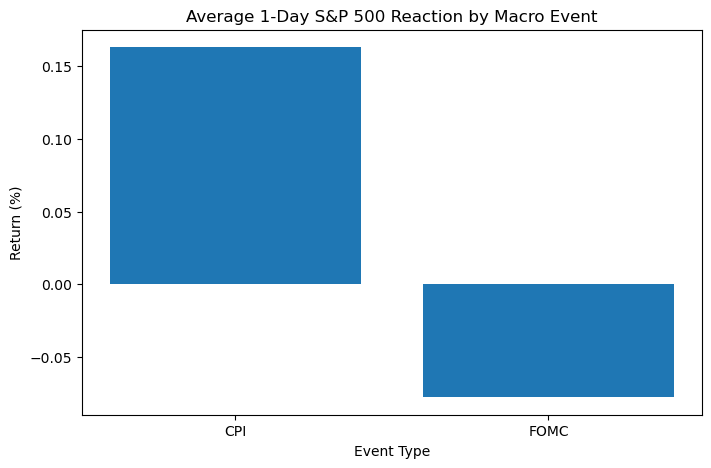

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(
    avg_reactions["event_type"],
    avg_reactions["SP500"]
)
plt.title("Average 1-Day S&P 500 Reaction by Macro Event")
plt.xlabel("Event Type")
plt.ylabel("Return (%)")
plt.show()

In [70]:
plt.figure(figsize=(8, 5))
plt.bar(
    avg_reactions["event_type"],
    avg_reactions["SP500"]
)
plt.title("Average 1-Day S&P 500 Reaction by Macro Event")
plt.xlabel("Event Type")
plt.ylabel("Return (%)")
plt.savefig("../charts/sp500_macro_event_reaction.png", dpi=150, bbox_inches="tight")
plt.close()

print("Saved chart to charts/sp500_macro_event_reaction.png")

Saved chart to charts/sp500_macro_event_reaction.png


In [71]:
plt.figure(figsize=(8, 5))
plt.bar(
    avg_reactions["event_type"],
    avg_reactions["UST_10Y"]
)
plt.title("Average 1-Day 10Y Treasury Reaction by Macro Event")
plt.xlabel("Event Type")
plt.ylabel("Change (bps)")
plt.savefig("../charts/ust10y_macro_event_reaction.png", dpi=150, bbox_inches="tight")
plt.close()

In [72]:
plt.figure(figsize=(8, 5))
plt.bar(
    avg_reactions["event_type"],
    avg_reactions["VIX"]
)
plt.title("Average 1-Day VIX Reaction by Macro Event")
plt.xlabel("Event Type")
plt.ylabel("Level Change")
plt.savefig("../charts/vix_macro_event_reaction.png", dpi=150, bbox_inches="tight")
plt.close()